# 이항분포
- 동전 던지면 N번 던지면 앞면이 몇 번 나오는가: 시행횟수는 n 회(샘플)

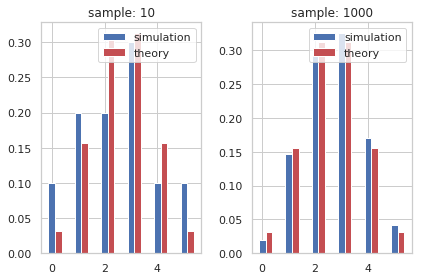

sample 10: 5번 던지면: 평균 2.4 번 나옴(분산: 1.42828568570857)
sample 1000: 5번 던지면: 평균 2.604 번 나옴(분산: 1.1158781295464124)


In [26]:
# 베르누이 분포 확률변수 X 모수: mu(1이 나올 확률)
# n_sample 10
fig, ax = plt.subplots(1,2)

N = 5; mu = 0.5; n = 10
rv = sp.stats.binom(N, mu)
sample2 = rv.rvs(size=n, random_state=99)

ax[0].bar(x=np.arange(N+1), height=np.bincount(sample2)/len(sample2), width=0.25, label='simulation')
ax[0].bar(x=np.arange(N+1) + 0.25, height=rv.pmf(np.arange(N+1)), color='r', width=0.25, label='theory',)
ax[0].set_title("sample: 10")
ax[0].legend()

# n_sample 1000
N = 5; mu = 0.5; n = 1000
rv = sp.stats.binom(N, mu)
sample1 = rv.rvs(size=n, random_state=99)

ax[1].bar(x=np.arange(N+1), height=np.bincount(sample1)/len(sample1), width=0.25, label='simulation')
ax[1].bar(x=np.arange(N+1) + 0.25, height=rv.pmf(np.arange(N+1)), color='r', width=0.25, label='theory',)
ax[1].legend()
ax[1].set_title("sample: 1000")

plt.tight_layout()
plt.show()

print("sample 10:", "5번 던지면: 평균 {a} 번 나옴(분산: {b})".format(a=sample2.mean(), b=sample2.std()))
print("sample 1000:", "5번 던지면: 평균 {a} 번 나옴(분산: {b})".format(a=sample1.mean(), b=sample1.std()))

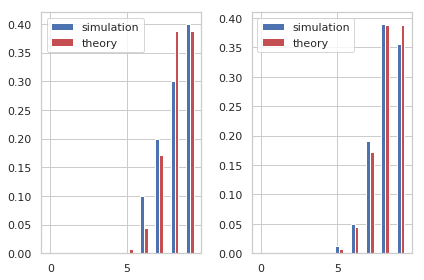

sample 10: 5번 던지면: 평균 8.0 번 나옴(분산: 1.0)
sample 1000: 5번 던지면: 평균 8.018 번 나옴(분산: 0.947457650768624)


In [27]:
# 베르누이 분포 확률변수 X 모수: mu(1이 나올 확률)
# n_sample 10
fig, ax = plt.subplots(1,2)

N = 9; mu = 0.9; n = 10
rv = sp.stats.binom(N, mu)
sample1 = rv.rvs(size=n, random_state=99)

ax[0].bar(x=np.arange(N+1), height=np.bincount(sample1)/len(sample1), width=0.25, label='simulation')
ax[0].bar(x=np.arange(N+1) + 0.25, height=rv.pmf(np.arange(N+1)), color='r', width=0.25, label='theory',)
ax[0].legend()

# n_sample 1000
N = 9; mu = 0.9; n = 1000
rv = sp.stats.binom(N, mu)
sample2 = rv.rvs(size=n, random_state=99)

ax[1].bar(x=np.arange(N+1), height=np.bincount(sample2)/len(sample2), width=0.25, label='simulation')
ax[1].bar(x=np.arange(N+1) + 0.25, height=rv.pmf(np.arange(N+1)), color='r', width=0.25, label='theory',)
ax[1].legend()

plt.tight_layout()
plt.show()

print("sample 10:", "5번 던지면: 평균 {a} 번 나옴(분산: {b})".format(a=sample1.mean(), b=sample1.std()))
print("sample 1000:", "5번 던지면: 평균 {a} 번 나옴(분산: {b})".format(a=sample2.mean(), b=sample2.std()))

# 카테고리 분포
- 주사위 던지기 1회

In [39]:
mu = np.array([1/6]*6)
rv = sp.stats.multinomial(1, mu)
mu

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

- `pmf`인수는 One-Hot-Encoding vetor(array)

In [40]:
xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [51]:
sample = rv.rvs(100)
sample.sum(axis=0)

array([18, 12, 20, 14, 20, 16])

- 주사위를 100번 던졌을 때, 1~6이 나오는 횟수

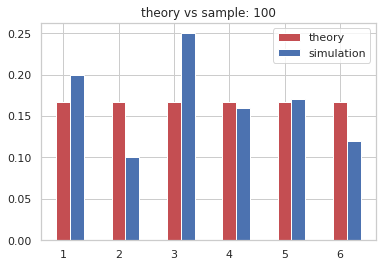

In [69]:
N = 100
sample = rv.rvs(N).sum(axis=0)
plt.bar(xx, rv.pmf(xx_ohe.values), color='r', width=0.25, label='theory')
plt.bar(xx + 0.25, sample/N, color='b', width=0.25, label='simulation')
plt.legend()
plt.title("theory vs sample: 100")
plt.show()

# 다항분포
- 주사위 던지기 N 번 던지기를, n 회 시행

In [75]:
N = 30
mu = [.1, .1, .1, .1, .3, .3]
rv = sp.stats.multinomial(N, mu)

- 열: 주사위 1회 던지는 카테고리 시도를, 30회 실행시 결과
- 위 시도를 100 번 시행

In [78]:
X = rv.rvs(100)
X[:5]

array([[ 1,  3,  6,  1, 10,  9],
       [ 3,  3,  3,  3,  7, 11],
       [ 3,  3,  2,  2,  7, 13],
       [ 4,  2,  3,  2,  8, 11],
       [ 1,  2,  2,  6, 10,  9]])

- 30회 던지는 행위를, 100번 했을 때 결과

In [92]:
df.head()

,trial,class,multinomial
0,0,0,1
1,0,1,3
2,0,2,6
3,0,3,1
4,0,4,10


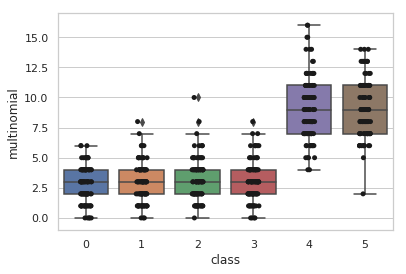

In [91]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "multinomial"]
sns.boxplot(x='class', y='multinomial', data=df)
sns.stripplot(x="class", y='multinomial', data=df, jitter=True, color='k')
plt.show()

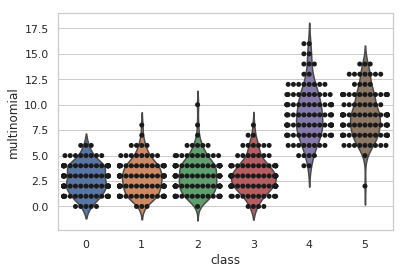

In [96]:
sns.violinplot(x='class', y='multinomial', data=df, inner='quartile')
sns.swarmplot(x="class", y='multinomial', data=df, color='k')
plt.show()